## 📦 1. Import Libraries & Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score




##  1. Load dataSet

In [3]:
# Load dataset
df = pd.read_csv("Total.csv")
df.head()


C:\Users\user\AppData\Local\Temp\ipykernel_9276\1901448964.py:2: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Total.csv")


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,Not Provided,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,Not Provided,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,Not Provided,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,Not Provided,326373.19,326373.19,2011


##  2. Data Cleaning


In [4]:
# Checking any Missing values
df.isnull().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312882 non-null  object 
 3   OvertimePay       312882 non-null  object 
 4   OtherPay          312882 non-null  object 
 5   Benefits          312882 non-null  object 
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 21.5+ MB


## 3: Exploratory Data Analysis (EDA)

In [6]:
df.describe()

,TotalPay,TotalPayBenefits,Year
count,312882.000000,312882.000000,312882.000000
mean,78802.645788,100928.339777,2014.625303
std,53230.758542,66485.186495,2.290899
min,-618.130000,-3628.780000,2011.000000
25%,38803.000000,48955.072500,2013.000000
50%,74908.790000,100011.290000,2015.000000
75%,111386.897500,142376.300000,2017.000000
max,592394.340000,712802.360000,2018.000000


TotalPay and TotalPayBenefits minimum values are negative

In [7]:
# Handeling negative and zero Pay values :
df = df[(df['TotalPay'] > 0) & (df['TotalPayBenefits'] > 0)]


In [8]:
# New Updated dataset
df.describe()

,TotalPay,TotalPayBenefits,Year
count,312173.000000,312173.000000,312173.000000
mean,78981.625208,101141.490339,2014.625246
std,53158.372642,66409.363813,2.291859
min,0.010000,0.010000,2011.000000
25%,39340.140000,49563.520000,2013.000000
50%,75031.820000,100172.370000,2015.000000
75%,111519.740000,142506.390000,2017.000000
max,592394.340000,712802.360000,2018.000000


In [9]:
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,Not Provided,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,Not Provided,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,Not Provided,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,Not Provided,326373.19,326373.19,2011


3.1 Top 10 Highest Paying Job Titles

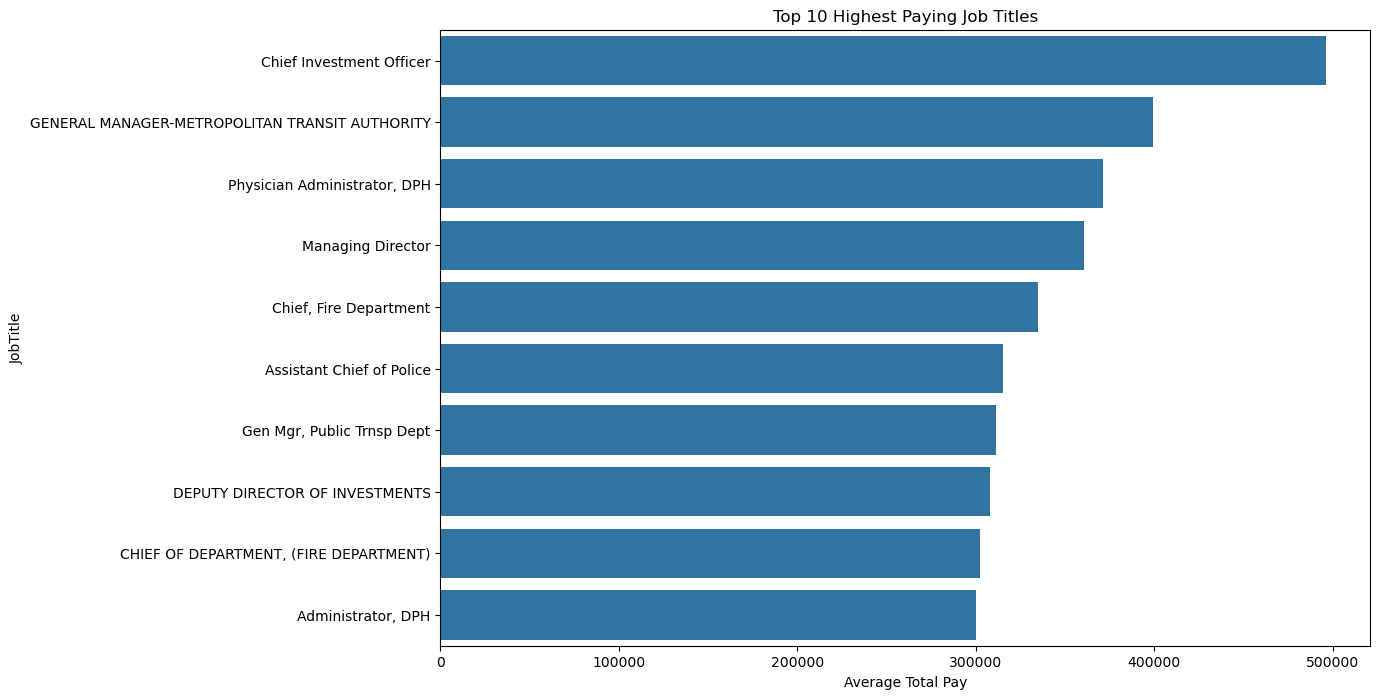

In [10]:
job_salary=df.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False).head(10)

#Plot
plt.figure(figsize=(12,8))
sns.barplot(x=job_salary.values,y=job_salary.index)
plt.title('Top 10 Highest Paying Job Titles')
plt.xlabel('Average Total Pay')
plt.show()

3.2 Distribution of Total Pay

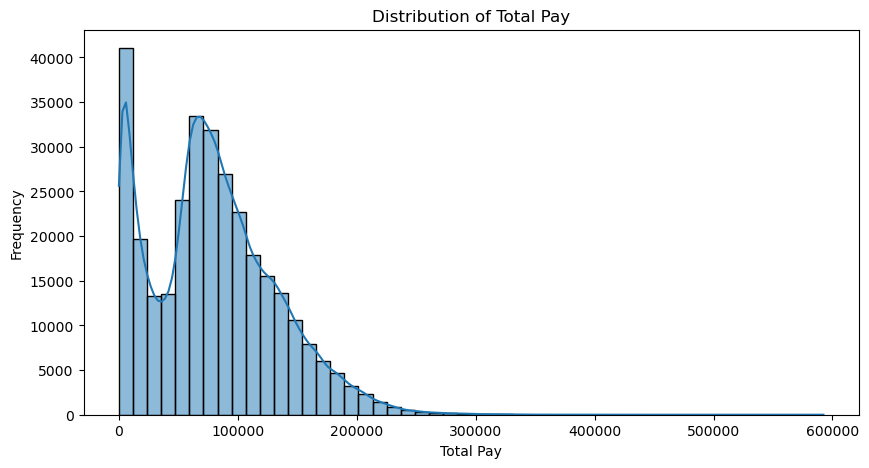

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(df['TotalPay'], bins=50, kde=True)
plt.title("Distribution of Total Pay")
plt.xlabel("Total Pay")
plt.ylabel("Frequency")
plt.show()


3.3 Correlation between Salary Components

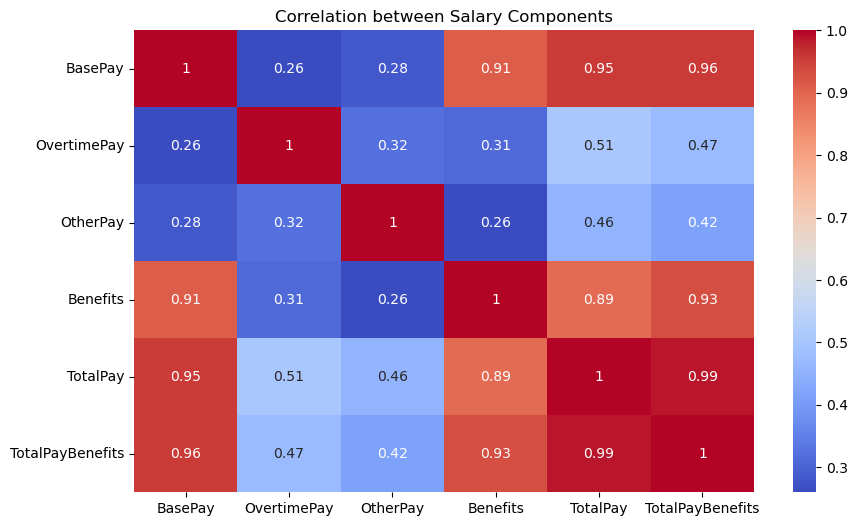

In [12]:
cols_to_convert = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')
plt.figure(figsize=(10, 6))
sns.heatmap(df[cols_to_convert].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Salary Components")
plt.show()


# 4. Label Encoding

In [13]:
# Encode Job Titles
le = LabelEncoder()
df['JobTitleEncoded'] = le.fit_transform(df['JobTitle'])
df.dropna(inplace=True)
# Define features and target
X = df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'JobTitleEncoded']]
y = df['TotalPay']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 5. Model train

In [14]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
# Predict on test data
y_pred = model.predict(X_test)

# 6. Model Evaluation

In [15]:
from sklearn.metrics import mean_absolute_error, r2_score
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')

Mean Absolute Error: 1.1909794474532236e-10
R-squared Score: 1.0


##  Visualization "Actual Sales" Vs "Predicted Sales"

C:\Users\user\AppData\Local\Temp\ipykernel_9276\3092010060.py:7: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


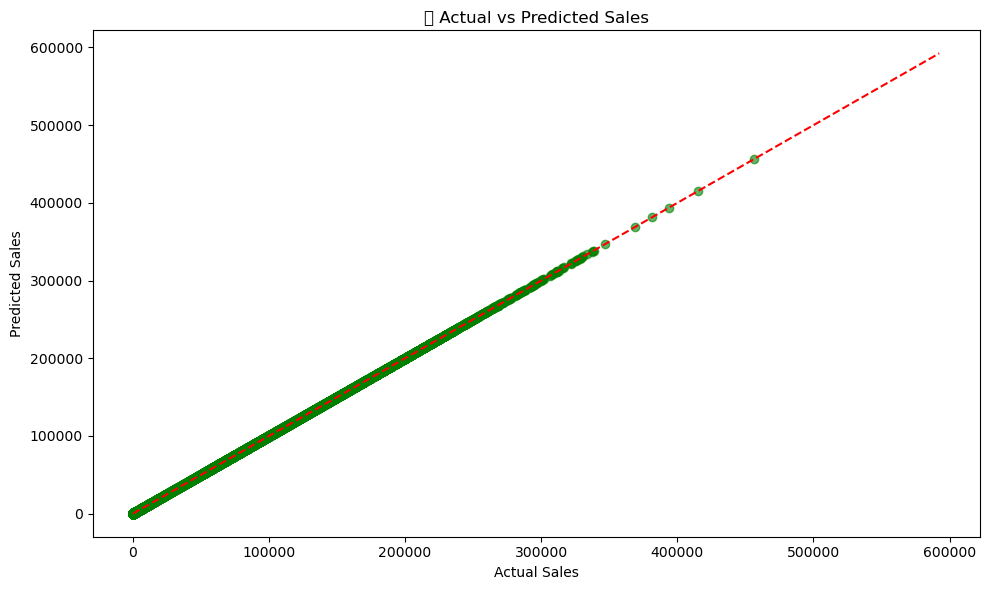

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("🔍 Actual vs Predicted Sales")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.tight_layout()
plt.show()

## Final Conclusion

In [19]:
{
    "MAE": mae,
    "R2_Score": r2,
    "Conclusion": (
        "✅ Project Completed Successfully!\n"
        f"📉 Model Evaluation Metrics:\n  - Mean Squared Error (MAE): {mae:.2f}\n  - R² Score: {r2:.2f}\n\n"
        "📘 Final Thoughts:\n"
        "The Linear Regression model gives a moderate prediction performance.\n"
        "To improve accuracy, consider applying more advanced ML models like XGBoost or Random Forest,\n"
        "along with deeper feature engineering or adding external factors like holidays or promotions."
    )
}

{'MAE': 1.1909794474532236e-10,
 'R2_Score': 1.0,
 'Conclusion': '✅ Project Completed Successfully!\n📉 Model Evaluation Metrics:\n  - Mean Squared Error (MAE): 0.00\n  - R² Score: 1.00\n\n📘 Final Thoughts:\nThe Linear Regression model gives a moderate prediction performance.\nTo improve accuracy, consider applying more advanced ML models like XGBoost or Random Forest,\nalong with deeper feature engineering or adding external factors like holidays or promotions.'}